# **Breast Cancer**

## **Data Collection**

## Objectives

* Fetch data from Kaggle
* Prepare data for further processes

## Data

The dataset used in this analysis was sourced from Kaggle.com (https://www.kaggle.com/datasets/amandam1/breastcancerdataset/data).

This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

* **Patient_ID**: unique identifier id of a patient

* **Age**: age at diagnosis (Years)

* **Gender**: Male/Female

* **Protein1, Protein2, Protein3, Protein4**: expression levels (undefined units)

* **Tumour_Stage**: I, II, III

* **Histology**: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

* **ER status**: Positive/Negative

* **PR status**: Positive/Negative

* **HER2 status**: Positive/Negative

* **Surgery_type**: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

* **Date_of_Surgery**: Date on which surgery was performed (in DD-MON-YY)

* **Date_of_Last_Visit**: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

* **Patient_Status**: Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

---

## Install the required libraries

In [3]:
%pip install kaggle pandas numpy seaborn matplotlib plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler



## Change working directory

* to save the data in a subfolder that is separate from the notebooks, we need to change the working directory from its current folder to its parent folder.

* We access the current directory with os.getcwd()

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Victo\\IBM-machine-learning-certification\\EDA\\breast_cancer\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [6]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [7]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Victo\\IBM-machine-learning-certification\\EDA\\breast_cancer'

## Reading and Understanding Our Data

Download the data.

In [8]:
!kaggle datasets download -d "amandam1/breastcancerdataset"

Dataset URL: https://www.kaggle.com/datasets/amandam1/breastcancerdataset
License(s): CC0-1.0




  0%|          | 0.00/10.8k [00:00<?, ?B/s]
100%|██████████| 10.8k/10.8k [00:00<00:00, 3.70MB/s]


Extract data from the zipfile into a new subfolder in the current directory.

In [9]:
import zipfile
with zipfile.ZipFile("breastcancerdataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

Delete zipfile after the csv files have been extracted.

In [10]:
if os.path.exists("breastcancerdataset.zip"):
  os.remove("breastcancerdataset.zip")
else:
  print("The file does not exist")

Read data from the file.

In [11]:
df = pd.read_csv("data/BRCA.csv")
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


Inspect features and data types of data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

Check number of observations.

In [13]:
df.shape[0]

341

Check column names.

In [14]:
df.columns.tolist()

['Patient_ID',
 'Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Date_of_Surgery',
 'Date_of_Last_Visit',
 'Patient_Status']

Check data type of each column.

In [15]:
df.dtypes

Patient_ID             object
Age                   float64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

According to the output above, we have 341 entries, 0 to 340, as well as 16 features.

We also have a mix of numerical (float64) and object data types.

View statistical information about each numerical value column, including the mean, median, and quantiles and range.

In [17]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df.rename({'50%': 'median'}, inplace=True)

stats_df

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
median,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900
range,61.000000,3.934500,4.380930,3.820800,3.655400


## Inspect Distribution

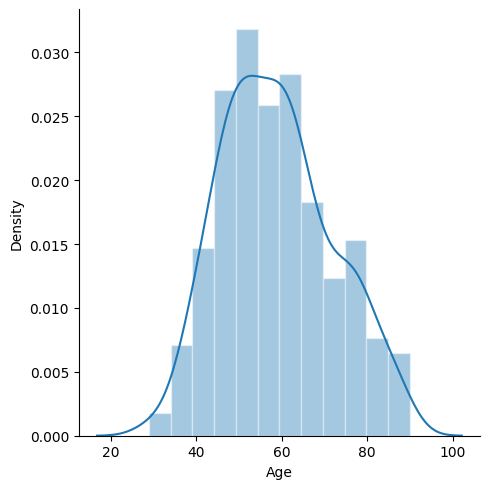

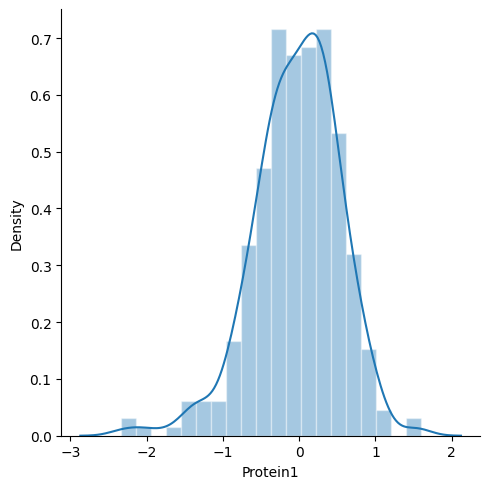

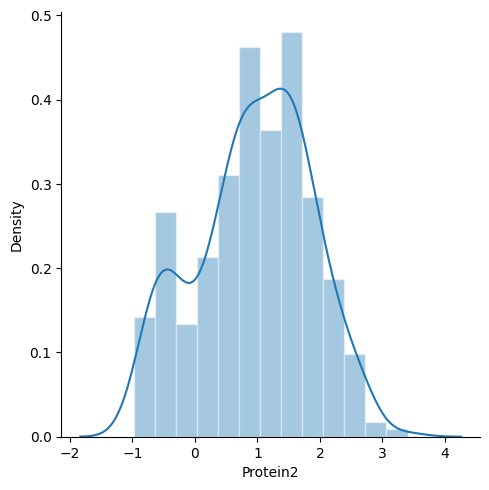

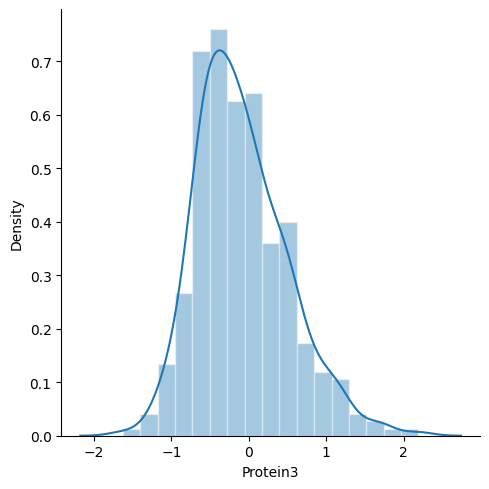

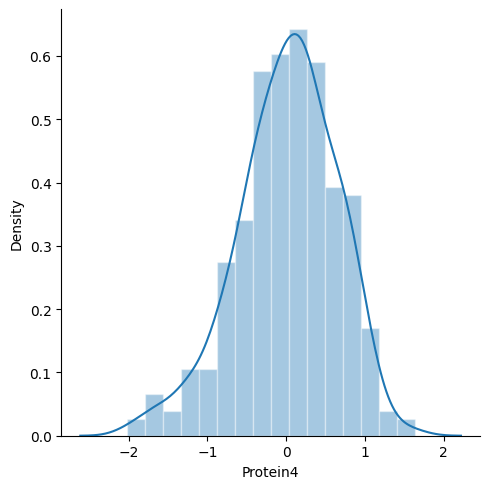

In [18]:
num_data = df.select_dtypes(include = ['float64'])

for i in num_data:
    sns.displot(
        df[i], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4)
    )

As the above plots shows, some of the numerical features deviate slightly from the normal distribution.

## Looking for Correlations

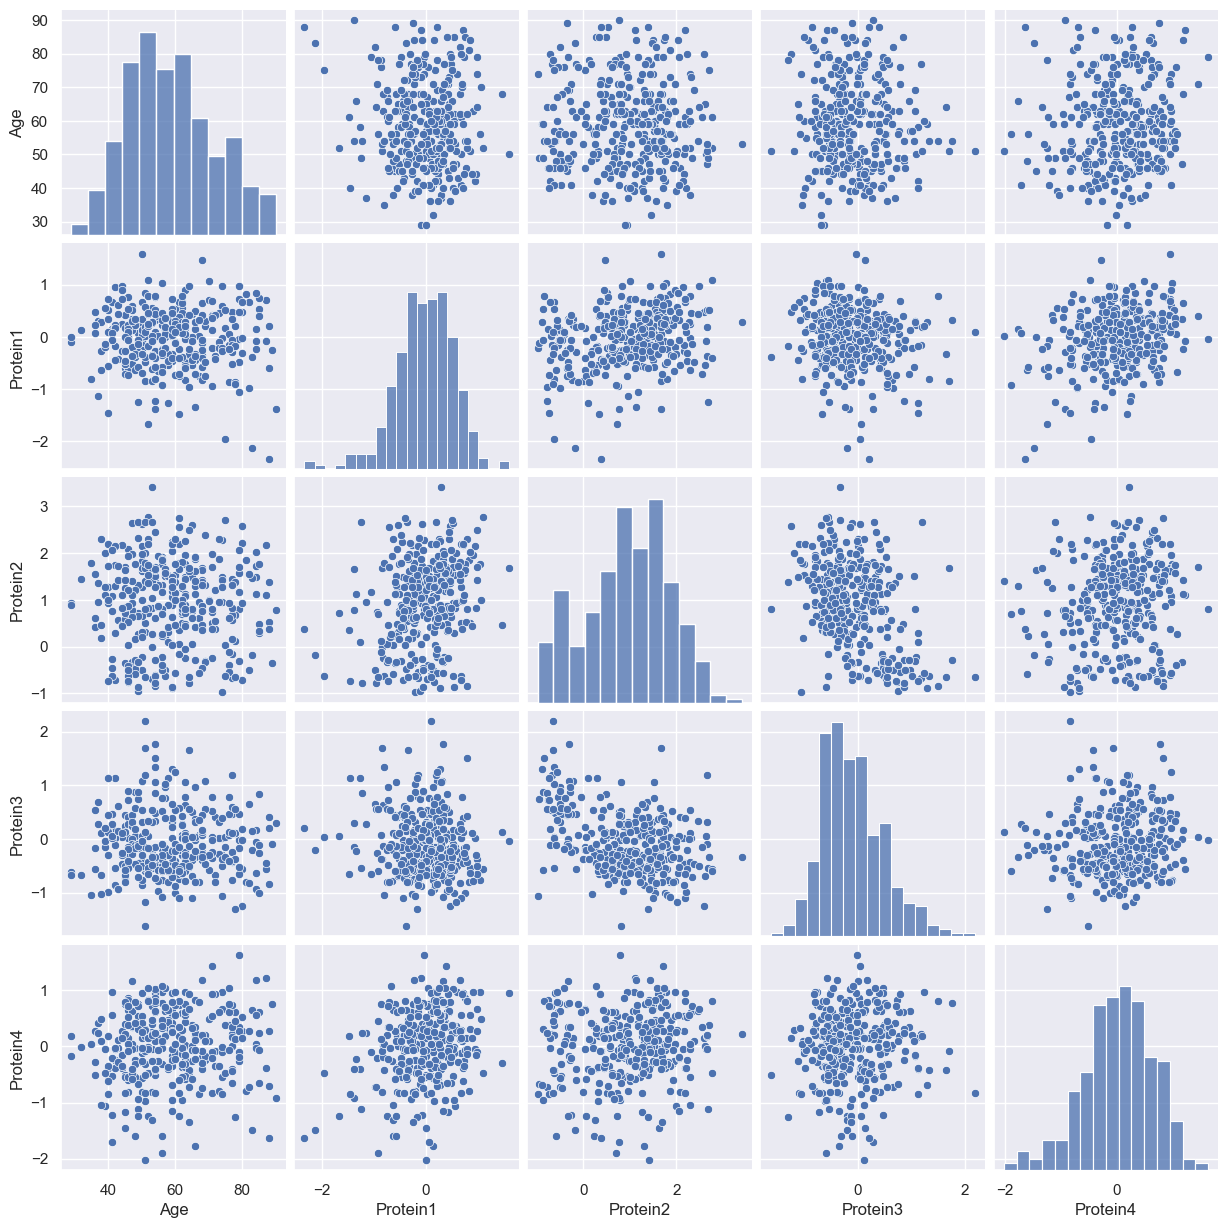

In [19]:
#sns.set_context('talk')
sns.set_theme(font_scale=1)
sns.pairplot(df)

There is no strong correlation or relationship apparent between the numerical features in our data.

Calculate the correlation coefficient using the `corr()` function on the numerical attributes of the data and list the features with a strong correlation with the target 'age' variable, based on the pearson correlation coefficient.

In [20]:
num_data_corr = num_data.corr()['Age'][1:]
top_features = num_data_corr[abs(num_data_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with age:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with age:
Series([], Name: Age, dtype: float64)


Above, we can see that there are 0 numerical features in our data, with coefficient greater than 0.5, that are strongly correlated with the age of a patient.

Below are pair plots to visually inspect the correlation between the the numerical features and age of the patient.

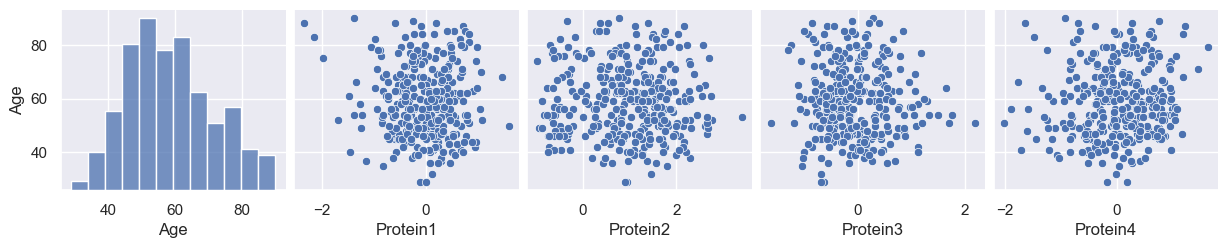

In [21]:
for i in range(0, len(num_data.columns), 5):
    sns.pairplot(data=num_data,
                x_vars=num_data.columns[i:i+5],
                y_vars=['Age'])

## Feature Scaling

In [26]:
df[StandardScaler().fit_transform(num_data)]

KeyError: "None of [Index([   (-1.7683967401910907, 0.19608256669313484, -0.5718254414814511, 1.0908022335953758, 0.42008513718583246),\n         (-1.2275134881546217, -0.6936174456231953, -0.4051827816329719, 1.2060173404187031, -0.06579136766382161),\n            (0.7814814479808355, 0.4335388376440234, 0.4004343437324793, -0.4060699697590311, -0.3885919336837492),\n         (-0.22301602008689303, 0.6665223790269101, -1.272550740343291, -0.17599916152581793, 0.18221365402123782),\n          (-0.22301602008689303, 0.44699078950329013, 1.0545251847489245, 1.0451064024577814, -0.5123436931803287),\n           (1.9405169880589839, -0.09219258395013258, 0.853815751336589, 0.05625375100329161, 0.05286576131186435),\n           (-0.4548231281025227, -0.07026963413668835, 0.5178718830416127, -0.463540606822717, 0.6077904304400036),\n           (-0.6866302361181523, 1.2483148544197644, 0.3648405525854642, -0.3951166619208063, -0.1945661144395946),\n            (1.3996337360225146, -0.21636636096754816, -1.7689413122500441, 2.189983789704735, 0.3301330670513061),\n        (-1.4593205961702513, -0.9519588936152938, 0.35143795221529184, -0.34786340732496446, 0.29314923361369455),\n       ...\n            (0.16332915993915642, -1.225209440167399, 1.759479992743975, -0.10274891535768939, 0.5251618916792616),\n           (1.5541718080329343, 0.9051923465590245, 1.2183225384532443, -0.7550183971239783, -0.31570687579421614),\n       (1.3223647000173047, -0.38077515700709264, -0.02343937158123428, -0.5614015665398571, -0.12365204173283216),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan),\n                                                                                         (nan, nan, nan, nan, nan)],\n      dtype='object', length=341)] are in the [columns]"

In [33]:
scaled_data = StandardScaler().fit_transform(num_data)
nums = pd.DataFrame(data=num_data)
StandardScaler().fit_transform(nums)
num_data.values() = StandardScaler().fit_transform(nums)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (954724555.py, line 4)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
df[df['Patient_ID'].isna()]

7 rows of the dataset are made up entirely of missing data points, these will be removed from the dataset.

In [ ]:
df = df.dropna(subset=['Patient_ID'])

In [ ]:
df['Patient_ID'].isnull().sum()

In [ ]:
df.shape[0]

### Detect Outliers

Box plots will be used to identify any possible outliers in our numerical data.

In [ ]:
sns.boxplot(x=df['Protein1'])

In [ ]:
def detect_outliers(*args):

    global outlier_dict
    outlier_dict = {}

    # calculate iqr
    for i in args:
        obs = df[i]
        array = obs.to_numpy()
        q25, q50, q75 = np.percentile(array, [25, 50, 75])
        iqr = q75 - q25

        # calculate min and max values
        min = q25 - 1.5*(iqr)
        max = q75 + 1.5*(iqr)

        # list outliers
        low = [x for x in obs if x < min]
        high = [x for x in obs if x > max]
        outliers = low + high

        outlier_dict[i] = {
            'lower': low,
            'higher': high
        }

        print(i + ':')
        print('min = ', min, ', 25th percentile = ', q25, ', 50th percentile = ', q50, ', 75th percentile = ', q75, ', max = ', max, sep='')

        if outliers:
            print('Outliers =', *outliers)
            print('Outliers Count =', len(outliers), '\n')
        else:
            print('No outliers\n')

In [ ]:
detect_outliers('Protein1', 'Protein2', 'Protein3', 'Protein4')

In [ ]:
outlier_dict

In [ ]:
df[df['Protein1'] <= np.max(outlier_dict['Protein1']['lower'])]

In [ ]:
sns.boxplot(x=df['Protein2'])

In [ ]:
sns.boxplot(x=df['Protein3'])

In [ ]:
sns.boxplot(x=df['Protein4'])

In [ ]:
# data cleaning 
fossils["age"].describe()

*From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.*

*From the above analysis we can note that the minimum value is greater than 0*

*25,500, 10,014, 10,897, 50,457*

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

### Encoding Categorical Variables:

- Check the unique values found in the 'geological_period' feature column.
- Create a list of the 'geological_period' values in desired order (timeline).
- Create a transformer to encode the column using the order in the list.

In [ ]:
fossils.geological_period.unique().tolist()

In [ ]:
gperiods = [
    'Neogene',
    'Paleogene',
    'Cretaceous',
    'Jurassic',
    'Triassic',
    'Permian',
    'Carboniferous',
    'Devonian',
    'Silurian',
    'Ordovician',
    'Cambrian'
]

gperiods_enc = OrdinalEncoder(categories=[gperiods], dtype=int)

- Check the unique values found in the 'stratigraphic_position' feature column.
- Create a list of the 'stratigraphic_position' values in desired order.
- Create a transformer to encode the column using the order in the list.

In [ ]:
fossils.stratigraphic_position.unique().tolist()

In [ ]:
sposition = ['Bottom', 'Middle', 'Top']

sposition_enc = OrdinalEncoder(categories=[sposition], dtype=int)

- Check unique values found in the 'paleomagnetic_data' and 'surrounding_rock_type' feature columns.
- Create a transformer to encode the values, the order used will be the default alphabetical order.

In [ ]:
fossils.paleomagnetic_data.unique().tolist()

In [ ]:
fossils.surrounding_rock_type.unique().tolist()

In [ ]:
enc = OrdinalEncoder(dtype=int)

Create a column transformer to apply the `gperiods` transformer to the 'geological_period' column, the `sposition_enc` transformer to the 'stratigraphic_position' column, and the `enc` transformer to the 'paleomagnetic_data' and 'surrounding_rock_type' columns. The remaining columns that are not specified in the column transformer will passed over and the column names will remain the same.

In [ ]:
ct = make_column_transformer(
    (gperiods_enc, ['geological_period']),
    (sposition_enc, ['stratigraphic_position']),
    (enc, ['paleomagnetic_data', 'surrounding_rock_type']),
    remainder = 'passthrough',
    verbose_feature_names_out=False,
)

Set the output container of the column transformer to a pandas dataframe.

In [ ]:
ct.set_output(transform='pandas')

Fit all transformers, transform the data and concatenate results.

In [ ]:
fossils_enc = ct.fit_transform(fossils)

In [ ]:
fossils_enc

In [ ]:
ct.get_feature_names_out()

In [ ]:
sns.set_context('talk')
sns.set_theme(font_scale=1)
sns.pairplot(fossils_enc)

In [ ]:
sns.set_theme(font_scale=0.75)
plt.figure(figsize=(18,18))
sns.heatmap(fossils_enc.corr(),annot=True,cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

## **Detecting Skew Variables**

In [ ]:
skew_limit = 0.50 # define a limit above which we will log transform
skew_vals = fossils_enc[['uranium_lead_ratio', 'stratigraphic_layer_depth', 'age']].skew()
skew_vals

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

The target variable and the features shown to have a correlation with the the target variable all have a skewness level below 0.5, which is within the acceptable range of -0.5 and 0.5 for a fairly symmetrical bell curve distribution. The values will not be transformed.